In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path=Path('IMBD.csv')
IMBD_df=pd.read_csv(file_path,encoding='UTF8')

IMBD_df=IMBD_df.drop_duplicates(subset='title')
IMBD_df


,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
8565,Alex,(2017–2019),NaN,47 min,"Action, Crime, Thriller",7.3,Add a Plot,"['Alain Darborg', '| ', ' Stars:', 'Dragomi...",33
8940,The Weekly with Wendy Mesley,(2018– ),NaN,NaN,"News, Reality-TV",NaN,How did Ontario's popular new Premier get so u...,"['Wendy Mesley, ', 'Billy Porter, ', 'Jacob To...",NaN
9520,The Drew Barrymore Show,(2020– ),TV-PG,44 min,Talk-Show,6.0,In the inaugural episode of The Drew Barrymore...,"['Adam Heydt', '| ', ' Stars:', 'Drew Barry...",19
9842,Hollywood Insider,(2018– ),NaN,NaN,Talk-Show,NaN,Behind the scenes of The Irishman.,"['Bobby Cannavale, ', 'Robert De Niro, ', 'Al ...",NaN


In [4]:
file_path_2=Path('MoviesOnStreamingPlatforms_updated.csv')
mosp_df=pd.read_csv(file_path_2,encoding="UTF8")
mosp_df=mosp_df.rename(columns={"Title":'title'})
mosp_df=mosp_df.drop_duplicates(subset='title')
mosp_df


,ID,title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1.0,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1.0,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1.0,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1.0,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1.0,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0.0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0.0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0.0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0.0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


In [5]:
merged_df=pd.merge(IMBD_df,mosp_df,on='title')

merged_df=merged_df.drop_duplicates(subset='title')
merged_df

,title,year,certificate,duration,genre,rating,description,stars,votes,ID,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Friends,(1994–2004),TV-14,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,"['Jennifer Aniston, ', 'Courteney Cox, ', 'Lis...","979,424",6519,...,0.0,0,1,0,0,NaN,"Comedy,Romance",United States,"English,Dutch,Italian,French",22.0
1,Echoes,(2022),TV-MA,326 min,"Drama, Mystery, Thriller",5.9,Leni and Gina are identical twins who have sec...,"['Michelle Monaghan, ', 'Matt Bomer, ', 'Karen...","9,380",11549,...,0.0,0,1,0,0,NaN,"Drama,Romance",United Kingdom,English,60.0
2,Look Both Ways,(2022),TV-14,110 min,"Comedy, Drama, Romance",6.3,"On the eve of her college graduation, Natalie'...","['Wanuri Kahiu', '| ', ' Stars:', 'Lili Rei...","14,313",5462,...,0.0,0,1,0,0,Sarah Watt,"Drama,Mystery,Romance",Australia,English,100.0
3,The Lincoln Lawyer,(2022– ),TV-MA,60 min,"Crime, Drama, Mystery",7.7,An iconoclastic idealist runs his law practice...,"['Manuel Garcia-Rulfo, ', 'Neve Campbell, ', '...","35,356",4478,...,0.0,0,1,0,0,Brad Furman,"Crime,Drama,Thriller",United States,English,118.0
4,Homeland,(2011–2020),TV-MA,55 min,"Crime, Drama, Mystery",8.3,A bipolar CIA operative becomes convinced a pr...,"['Claire Danes, ', 'Mandy Patinkin, ', 'Damian...","339,482",3484,...,1.0,0,0,0,0,NaN,"Crime,Drama,Mystery,Thriller",United States,English,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,Shelter,(2003),NaN,80 min,Drama,6.3,Three inner-city teens find themselves strande...,"['Benno Schoberth', '| ', ' Stars:', 'Ray S...",47,8524,...,0.0,0,1,0,0,Jonah Markowitz,"Drama,Romance,Sport",United States,English,97.0
1481,Metro,(2008),NaN,120 min,Drama,NaN,The dark heart of the city is the setting for ...,"['Christopher Dorrah', '| ', ' Stars:', 'Ch...",NaN,2455,...,1.0,0,0,0,0,Luc Besson,Thriller,France,French,104.0
1482,Horton Hears a Who!,NaN,NaN,NaN,Animation,NaN,Follows the sweet-natured young pachyderm. He ...,[],NaN,3643,...,0.0,1,0,0,0,"Jimmy Hayward,Steve Martino","Animation,Adventure,Comedy,Family,Fantasy",United States,English,86.0
1483,Grillo vs Grillo,(2017),NaN,96 min,Comedy,5.3,The Italian comedian-turned-politician Beppe G...,"['Enzo Pirrone', '| ', ' Star:', 'Beppe Gri...",131,3274,...,1.0,0,0,0,0,Enzo Pirrone,Comedy,Italy,Italian,NaN


In [6]:
no_na_df=merged_df.dropna()

In [7]:
director_group=no_na_df.loc[no_na_df['Netflix']==1].groupby(no_na_df['Directors']).value_counts()
director_group

Directors                     title                                             year    certificate  duration  genre                        rating  description                                                                                                                                                                                                                         stars                                                                                                                              votes   ID    Year  Age  IMDb  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  Directors                     Genres                               Country                        Language                  Runtime
Aaron Lieber                  Bethany Hamilton: Unstoppable                     (2018)  PG           100 min   Documentary, Sport           7.4     After losing an arm to a shark attack at age 13, Bethany Hamilton refuses to give up her dreams of being a professional su

In [8]:
genre_grouped_df=pd.DataFrame(merged_df.groupby('Genres')['rating'].mean())
genre_grouped_df["Genre"]=genre_grouped_df.index
genre_grouped_df


,rating,Genre
Genres,,
Action,4.440000,Action
"Action,Adventure,Comedy",5.233333,"Action,Adventure,Comedy"
"Action,Adventure,Comedy,Crime",7.000000,"Action,Adventure,Comedy,Crime"
"Action,Adventure,Comedy,Crime,Thriller",5.600000,"Action,Adventure,Comedy,Crime,Thriller"
"Action,Adventure,Comedy,Horror,Sci-Fi,Thriller",3.650000,"Action,Adventure,Comedy,Horror,Sci-Fi,Thriller"
...,...,...
"Short,Drama",6.100000,"Short,Drama"
"Short,Family,Fantasy,Musical",5.800000,"Short,Family,Fantasy,Musical"
"Short,Horror,Sci-Fi,Thriller",7.600000,"Short,Horror,Sci-Fi,Thriller"


In [9]:
merged_df.dtypes

title               object
year                object
certificate         object
duration            object
genre               object
rating             float64
description         object
stars               object
votes               object
ID                   int64
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix            float64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [24]:
merged_df['primary_genre'] = merged_df['Genres'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else None)


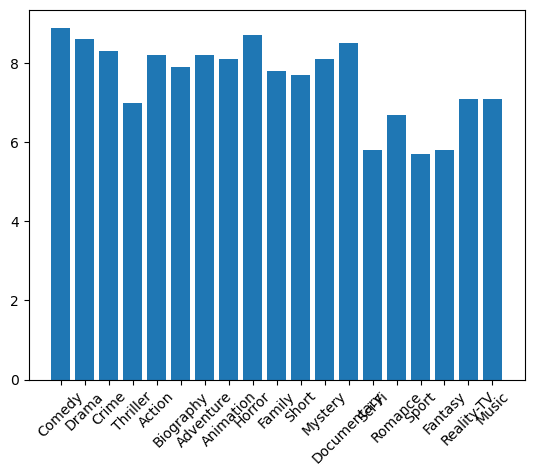

In [33]:

# Drop rows where 'primary_genre' or 'rating' is None or NaN
filtered_df = merged_df.dropna(subset=['primary_genre', 'rating'])

# Plotting the bar chart
plt.bar(filtered_df['primary_genre'], filtered_df['rating'])
plt.xticks(rotation=45)
plt.show()

In [56]:
skinny_df=merged_df.drop(columns=['genre','Genres','votes','ID','Hulu','Prime Video','Disney+','Type','Netflix','Rotten Tomatoes','stars','description'])
skinny_df['rating'] = skinny_df['rating'].fillna(skinny_df['IMDb'])
no_imdb_skinny_df=skinny_df.drop(columns=['IMDb','Directors','certificate'])
no_imdb_skinny_df['Genre']=no_imdb_skinny_df['primary_genre']
unorganized_df=no_imdb_skinny_df.drop(columns='primary_genre')
organized_df=unorganized_df[['title','Genre','Year','rating','Language','Country','Runtime']]
organized_df

,title,Genre,Year,rating,Language,Country,Runtime
0,Friends,Comedy,1971,8.9,"English,Dutch,Italian,French",United States,22.0
1,Echoes,Drama,2014,5.9,English,United Kingdom,60.0
2,Look Both Ways,Drama,2005,6.3,English,Australia,100.0
3,The Lincoln Lawyer,Crime,2011,7.7,English,United States,118.0
4,Homeland,Crime,2019,8.3,English,United States,55.0
...,...,...,...,...,...,...,...
1480,Shelter,Drama,2017,6.3,English,United States,97.0
1481,Metro,Thriller,2016,7.3,French,France,104.0
1482,Horton Hears a Who!,Animation,2008,6.8,English,United States,86.0
1483,Grillo vs Grillo,Comedy,2017,5.3,Italian,Italy,NaN


In [57]:
organized_df.to_csv('Concise_Data.csv', index=False)